In [1]:
from dock_db import utils
from dock_db.extract import analyze 
from dock_db.extract import render 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import RDLogger        
RDLogger.DisableLog('rdApp.*')

## Find the docking experiments we want to analyze

In [2]:
sq = "SELECT job_id FROM dockinginfo"
curs = utils.connect_to_db('/home/francesco/keys/.env')
curs.execute(sq)
job_ids = curs.fetchall()
job_ids

DB connection established


[('BTK_smina_structure_selection_31oct2022',),
 ('ABL1_smina_acs_03jun2023',),
 ('AKT1_smina_acs_10jul2023',),
 ('CDK2_smina_acs_06jul2023',)]

## Visualize docking performance

In [2]:
sq = "SELECT cmp_id, pose_id, docking_score, canonical_smiles, pdb_id, pose_location FROM results where job_id = 'BTK_smina_structure_selection_31oct2022'"
curs = utils.connect_to_db()
curs.execute(sq)
btk_results = curs.fetchall()
btk_results_df = pd.DataFrame(btk_results, columns=['cmp_id', 'pose_id', 'docking_score', 'canonical_smiles', 'pdb_id', 'docked_pose_location'])
btk_results_df[:5]

OperationalError: could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5555?


/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-packages/dock_db/extract/analyze.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'docking_score'] = [float(x) for x in df['docking_score'].values]
/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-packages/dock_db/extract/analyze.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'docking_score'] = [float(x) for x in df['docking_score'].values]
/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-p

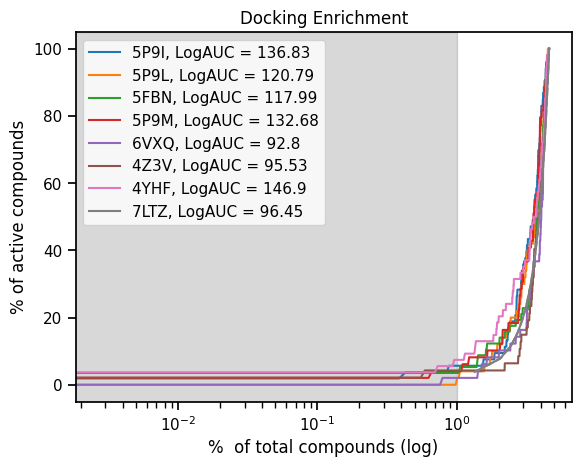

In [ ]:
plot = analyze.plot_enrichment(btk_results_df['pdb_id'].unique(), btk_results_df)
plot.title('Docking Enrichment')
plot.show()

## DockDB makes poses visualization easy

In [5]:
curs = utils.connect_to_db()
sq = "SELECT pdb_id, structure_location FROM structures WHERE uniprot_id = 'Q06187'"
curs.execute(sq)
structures_ids = curs.fetchall()
structures_df = pd.DataFrame(structures_ids, columns=['pdb_id', 'structure_location'])

DB connection established


In [6]:
visualizer = render.Rendering()
view = visualizer.visualize_structure(structures_df, '5P9I')
view

attemping to connect to s3


NGLWidget()

In [5]:
sq = "SELECT results_location FROM dockinginfo where job_id = 'BTK_smina_structure_selection_31oct2022'"
curs = utils.connect_to_db()
curs.execute(sq)
result_loc = curs.fetchall()
result_loc = pd.DataFrame(result_loc,columns=['results_location'])
result_loc

DB connection established


results_location
0  s3://hd-docking/structure_selection/results/

In [ ]:
ciao = render.Rendering()
ciao.visualize_docked(structures_df, result_loc, btk_results_df, '5P9I', 'HD200000351436')

attemping to connect to s3
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions
retrieving the interactions


interactive(children=(Dropdown(description='selected_widget', options={'HD200000351436: Pose 1': NGLWidget(), …

## DockDB streamlines polypharmacology

In [ ]:
sq = "SELECT job_id FROM dockinginfo"
curs = utils.connect_to_db()
curs.execute(sq)
job_ids = curs.fetchall()
job_ids

DB connection established


[('BTK_smina_structure_selection_31oct2022',),
 ('ABL1_smina_acs_03jun2023',),
 ('AKT1_smina_acs_10jul2023',),
 ('CDK2_smina_acs_06jul2023',)]

We can get the 

In [ ]:
sq = "SELECT cmp_id, docking_score, canonical_smiles, result_comment FROM results where job_id = 'ABL1_smina_acs_03jun2023' and result_comment = 'active'"
curs = utils.connect_to_db()
curs.execute(sq)
abl1_results_active = curs.fetchall()
abl1_results_active_df = pd.DataFrame(abl1_results_active, columns=['cmp_id', 'docking_score', 'canonical_smiles', 'result_comment'])

DB connection established


In [ ]:
threshold = abl1_results_active_df['docking_score'].quantile(0.05)
threshold

-11.2146405

/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


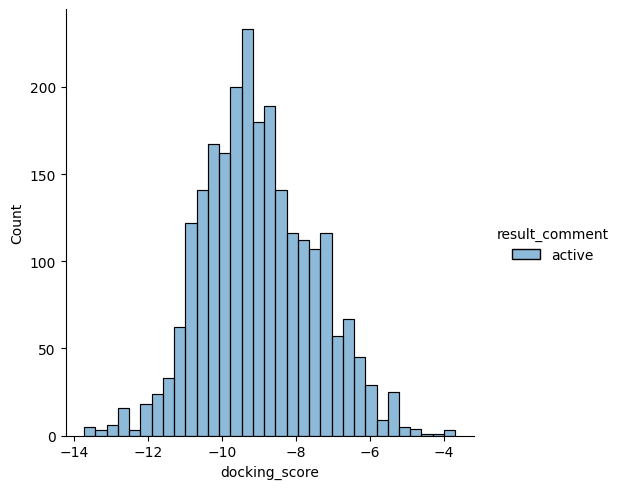

In [ ]:
sns.displot(data=abl1_results_active_df, x='docking_score', hue='result_comment')
plt.show()

In [ ]:
sq = "SELECT cmp_id, docking_score, canonical_smiles, result_comment FROM results where job_id = 'CDK2_smina_acs_06jul2023' and result_comment = 'active'"
curs = utils.connect_to_db()
curs.execute(sq)
cdk2_results_active = curs.fetchall()
cdk2_results_active_df = pd.DataFrame(cdk2_results_active, columns=['cmp_id', 'docking_score', 'canonical_smiles', 'result_comment'])

DB connection established


In [ ]:
threshold = cdk2_results_active_df['docking_score'].quantile(0.05)
threshold

-9.975005

/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


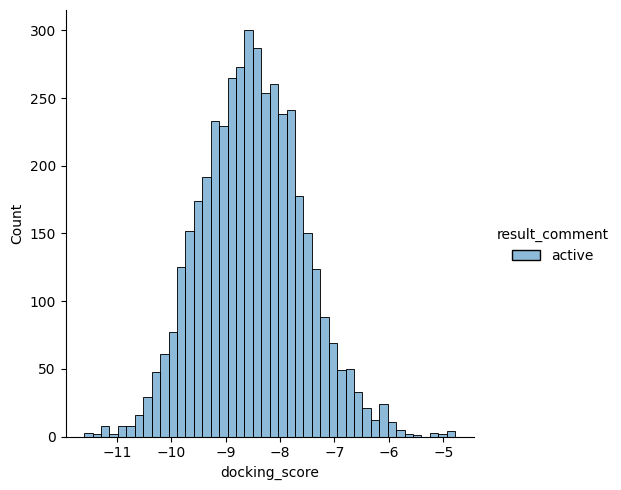

In [ ]:
sns.displot(data=cdk2_results_active_df, x='docking_score', hue='result_comment')
plt.show()

From the distributions above we can see that the best scoring 

In [ ]:
sq = "SELECT DISTINCT canonical_smiles FROM results WHERE cmp_id IN (SELECT cmp_id FROM results WHERE job_id = 'ABL1_smina_acs_03jun2023' AND docking_score < -11) AND cmp_id IN (SELECT cmp_id FROM results WHERE job_id = 'CDK2_smina_acs_06jul2023' AND docking_score < -10) AND result_comment = 'active'"
curs = utils.connect_to_db()
curs.execute(sq)
poly_results_active = curs.fetchall()
poly_results_active = pd.DataFrame(poly_results_active, columns=['canonical_smiles'])

DB connection established


In [ ]:
poly_results_active

canonical_smiles
0  Cn1cc(C=C2Oc3cccc(O)c3C2=O)c2c(-c3ccc(C(=O)NCC...
1  COC(C(=O)N1Cc2[nH]nc(NC(=O)c3ccc(N4CCN(C)CC4)c...

/home/francesco/anaconda3/envs/test_dockdb/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


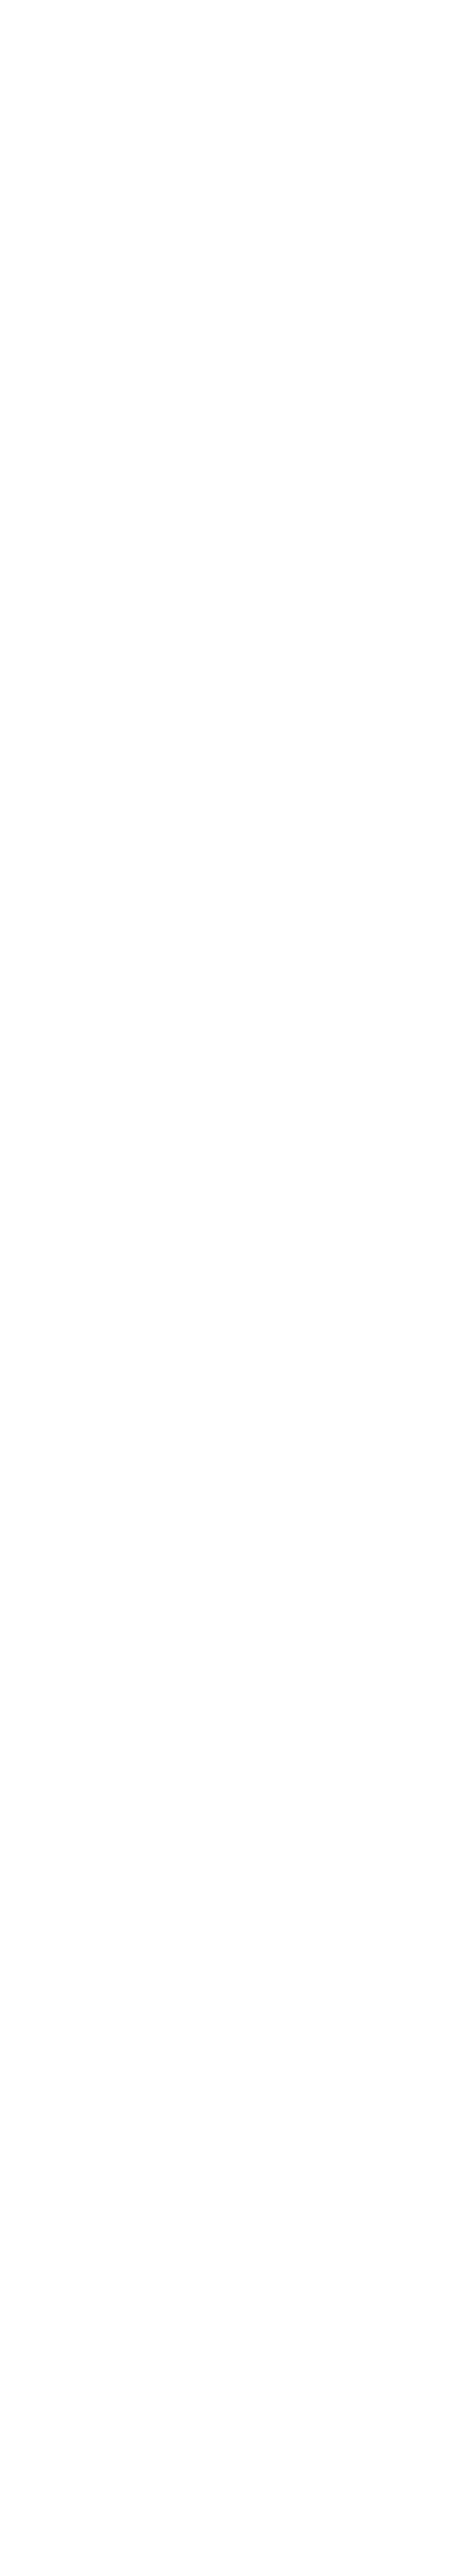

In [ ]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in np.unique(cdk2_results_active)])

## DockDB: comparing apples to apples 
For this we have to check the experimental setup! For that we have to check the docking info table


In [ ]:
sq = "SELECT docking_parameters, job_id FROM dockinginfo"
curs = utils.connect_to_db()
curs.execute(sq)
parameters = curs.fetchall()
parameters_df = pd.DataFrame(parameters, columns=['docking_parameters', 'job_id'])

DB connection established


In [ ]:
parameters_df.head()

docking_parameters  \
0  --autobox_ligand -r -l -o --log --addH False   
1  --autobox_ligand -r -l -o --log --addH False   
2  --autobox_ligand -r -l -o --log --addH False   
3  --autobox_ligand -r -l -o --log --addH False   

                                    job_id  
0  BTK_smina_structure_selection_31oct2022  
1                 ABL1_smina_acs_03jun2023  
2                 AKT1_smina_acs_10jul2023  
3                 CDK2_smina_acs_06jul2023